In [33]:
import cvxpy as cp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

# Define Gaussian basis for linear regression

### Definition

In [35]:
def gaussian_basis(locations, scale, x): 
    
    phi = np.ones(len(locations))
    
    
    for m in range(len(locations)):
        phi[m] = np.exp(- 0.5*( (np.transpose(x - locations[m])/scale).dot(x - locations[m]) ))
        
    return phi

### Visaulize Gaussian basis

In [36]:
# M is the number of Gaussian bases
num_basis = 10

# The design matrix: Page 142, eq (3.16) 
Phi = np.ones((100, num_basis+1))

# Locations and scale of Gaussian bases 
locations = np.linspace(0, 1, num_basis).reshape((num_basis, 1))
scale = 0.01

In [37]:
x = np.linspace(0, 1, num=100).reshape((100, 1))

# Evaluate the design matrix (different Gaussian bases's values between [0, 1])
for n in range(100):
    Phi[n, 1:] = gaussian_basis(locations, scale, x[n])

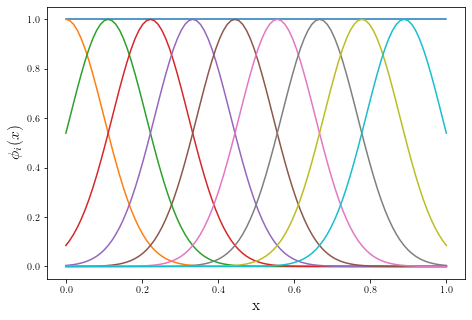

In [38]:
plt.figure(figsize=(7.5, 5))
for m in range(num_basis):
    plt.plot(x, Phi[:, m], '-')
plt.xlabel('x', fontsize = 16)
plt.ylabel('$\phi_i(x)$', fontsize = 16)
plt.show()

# Generate sinusoidal data

In [39]:
# y = np.sin(2*np.pi*x) + np.random.normal(0, 0.2, (10))

def sinusoidal_data(L=100, N=25, sigma=0.2): 
    x = np.linspace(0, 1, num=N).reshape((N, 1))
    Y = np.tile(np.sin(2*np.pi*x), (1, L)) + np.random.normal(0, sigma, (N, L))
    return x, Y

In [40]:
L = 100
N = 25
sigma = 0.5

x, Y = sinusoidal_data(L, N, sigma)

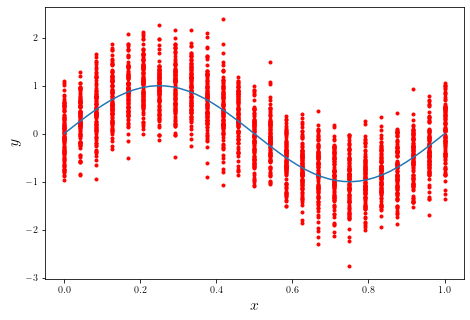

In [41]:
plt.figure(figsize=(7.5, 5))
plt.plot(x, Y, '.', color='r', alpha=1)
plt.plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), '-')
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.show()

# Linear regression with Gaussian basis

### Least square with quadratic regularizer (Ridge regression): 

$$\boldsymbol{w}^* = (\lambda\boldsymbol{I} + \boldsymbol{\Phi}^\top\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\top\boldsymbol{y}.$$


In [42]:
def gaussian_fit(x, y, M, l = 1): 
    
    # x is the (N,) input vector 
    # y is the (N,) output vector
    # M is the number of gaussian basis
    # Phi is the (N, M+1) design matrix
    # w is the (M+1,) coefficients vector
    
    N = np.size(x)
    Phi = np.zeros((N, M+1))
    
    locations = np.linspace(0, 1, num=M).reshape((M, 1))
    scale = 0.01
    
    for n in range(N):
        Phi[n, 1:] = gaussian_basis(locations, scale, x[n])
        
    w = np.linalg.inv(l*np.eye(M+1) + np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
    
    return w

### Optimal weights for all sinusoidal data sets 

In [43]:
# M is the number of Gaussian bases
M = 24

W_1 = np.zeros((L, M+1))
W_2 = np.zeros((L, M+1))
W_3 = np.zeros((L, M+1))

for l in range(L): 
    W_1[l, :] = gaussian_fit(x, Y[:, l], M, 10**-1)
    W_2[l, :] = gaussian_fit(x, Y[:, l], M, 10**1)
    W_3[l, :] = gaussian_fit(x, Y[:, l], M, 10**2)

### Fit curves for all sinusoidal data sets

In [44]:
#phi = np.ones((M+1, 1))
#y_hat = np.zeros((N,))
#for n in range(N):
#    phi = gaussian_basis(locations, scale, x[n])
#    y_hat[n] = np.transpose(w).dot(phi)

# Locations and scale of Gaussian bases 
locations = np.linspace(0, 1, M).reshape((M, 1))
scale = 0.01
    
phi_1 = np.zeros((M+1, L))
Y_hat_1 = np.zeros((N, L))
for l in range(L):
    w = W_1[l, :]
    for n in range(N):
        phi_1[1:, l] = gaussian_basis(locations, scale, x[n])
        Y_hat_1[n, l] = np.transpose(w).dot(phi_1[:, l])
        
phi_2 = np.zeros((M+1, L))
Y_hat_2 = np.zeros((N, L))
for l in range(L):
    w = W_2[l, :]
    for n in range(N):
        phi_2[1:, l] = gaussian_basis(locations, scale, x[n])
        Y_hat_2[n, l] = np.transpose(w).dot(phi_2[:, l])
        
phi_3 = np.zeros((M+1, L))
Y_hat_3 = np.zeros((N, L))
for l in range(L):
    w = W_3[l, :]
    for n in range(N):
        phi_3[1:, l] = gaussian_basis(locations, scale, x[n])
        Y_hat_3[n, l] = np.transpose(w).dot(phi_3[:, l])

In [45]:
phi_1.shape

(25, 100)

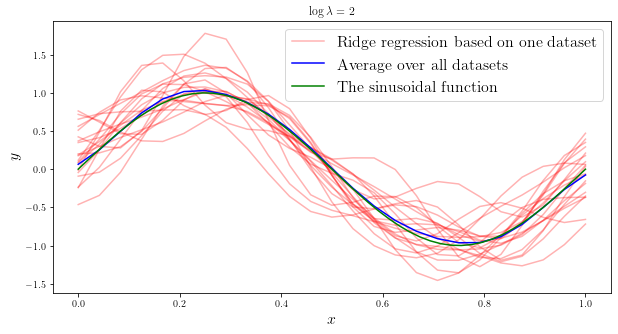

In [46]:
plt.figure(figsize=(10, 5))
for l in range(20):
    if l == 0:
        plt.plot(x, Y_hat_1[:, l], 'r-', alpha=0.3, label = 'Ridge regression based on one dataset')
    else:
        plt.plot(x, Y_hat_1[:, l], 'r-', alpha=0.3)
plt.plot(x, np.mean(Y_hat_1, axis=1), 'b-', label = 'Average over all datasets')
plt.plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), 'g-', label = 'The sinusoidal function')
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)

plt.title(r'$\log\lambda = 2$')
plt.legend(fontsize = 16, loc = 'upper right')
plt.show()

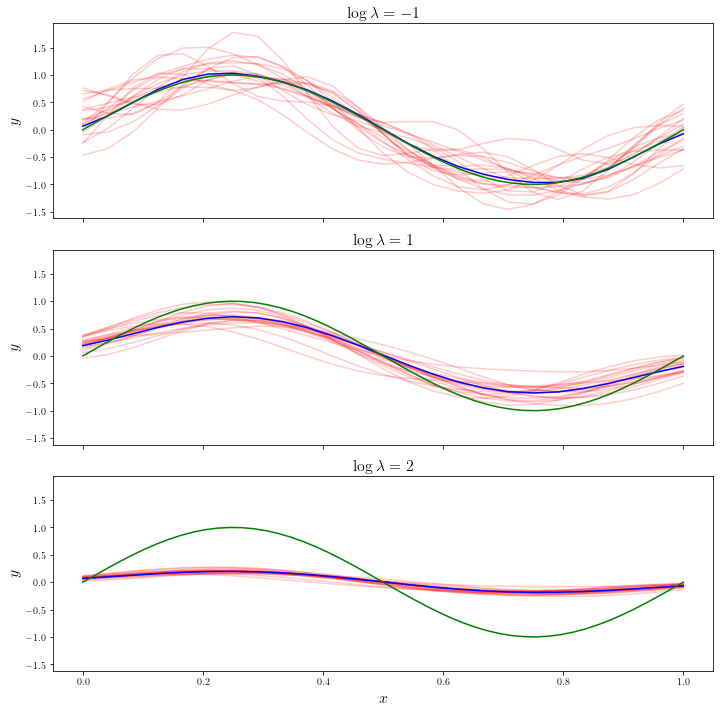

In [66]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(10, 10))
for l in range(20):
    axs[0].plot(x, Y_hat_1[:, l], 'r-', alpha=0.2)
    axs[1].plot(x, Y_hat_2[:, l], 'r-', alpha=0.2)
    axs[2].plot(x, Y_hat_3[:, l], 'r-', alpha=0.2)
axs[0].plot(x, np.mean(Y_hat_1, axis=1), 'b-')
axs[1].plot(x, np.mean(Y_hat_2, axis=1), 'b-')
axs[2].plot(x, np.mean(Y_hat_3, axis=1), 'b-')
axs[0].plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), 'g-')
axs[1].plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), 'g-')
axs[2].plot(np.linspace(0, 1, num=50), np.sin(2*np.pi*np.linspace(0, 1, num=50)), 'g-')

axs[0].set_title(r'$\log\lambda = -1$')
axs[1].set_title(r'$\log\lambda = 1$')
axs[2].set_title(r'$\log\lambda = 2$')

axs[2].set(xlabel = r'$x$')
for ax in axs.flat:
    ax.set(ylabel=r'$y$')
    ax.xaxis.get_label().set_fontsize(16)
    ax.yaxis.get_label().set_fontsize(16)
    ax.title.set_size(16)

fig.tight_layout()